In [54]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

In [55]:
#my scatterplot defination
def scatterplot(data):
    x = data[:,:2]
    y = data[:,-1]
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap='rainbow')
    plt.colorbar()

    # Set the axis labels and title
    plt.xlabel('x1')
    plt.ylabel('x2')
#     ax.invert_yaxis()
    plt.title('Scatter Plot with Labels')

In [56]:
data = np.loadtxt('dataset_1.csv',delimiter='\t',dtype = 'float')
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  9.,  0.,  2.],
       ...,
       [ 0.,  1., 10., ...,  9.,  0.,  2.],
       [ 0.,  0., 15., ...,  2.,  0.,  2.],
       [ 0.,  0.,  6., ...,  0.,  0.,  0.]])

In [57]:
x = data[:,:-1]
y = data[:,-1]

# LDA

In [58]:
def divide_labels(data):
    arr = data[:,-1]
    arr = list(arr)
    
#   dividing data corresponding to the labels
    L = sorted(list(set(arr)))
    L1 = []
    for i in range(len(L)):
        temp = []
        for x in data:
            if(int(x[-1])==L[i]):
#                 print(type(list(x)))
                temp.append(list(x[:-1]))
        temp = np.array(temp)
        L1.append(temp)
#         i+=1
    #returning divided labels
    return L1

In [59]:
dividedLabels = divide_labels(data)

In [60]:
dividedLabels[0]

array([[0., 0., 5., ..., 0., 0., 0.],
       [0., 0., 1., ..., 3., 0., 0.],
       [0., 0., 3., ..., 4., 0., 0.],
       ...,
       [0., 0., 9., ..., 4., 0., 0.],
       [0., 0., 5., ..., 8., 1., 0.],
       [0., 0., 6., ..., 6., 0., 0.]])

In [61]:
def covariance(x,y):
#     covariance between two columns can be found out by the below funciton.
    xm = np.mean(x)
    ym = np.mean(y)
#     print(x.shape)
    x = x-xm
    y = y-ym
    #this is standard formula
    s = x.dot(y.T)
#     print(s)
    return s

In [62]:
def covMatrix(data):
#     forming covariacne matrix
    mat = np.zeros((data.shape[1],data.shape[1]))
    for i in range(data.shape[1]):
        for j in range(i,data.shape[1]):
            mat[i][j]=covariance(data[:,i],data[:,j])
            mat[j][i]=mat[i][j]
    return mat
        

In [63]:
sw = np.zeros((data.shape[1]-1,data.shape[1]-1))
for t in dividedLabels:
    #as per defination of sw
    sw = sw+covMatrix(t)
sw = sw+np.eye(sw.shape[0])*1e-06


In [64]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)

In [65]:
t = []
for i in range(data.shape[1]-1):
    t.append(np.mean(data[:,i]))
muWhole = []
muWhole.append(t)
# globally declaring a varible muWhole to later use it to compute sb
muWhole = np.array(muWhole)
# print(muWhole.shape)

In [66]:
def subSB(data,muW):
#     This gives in between class variance
    t = []
    for i in range(data.shape[1]):
        t.append(np.mean(data[:,i]))
    mu = []
    mu.append(t)
    mu = np.array(mu)
    mu = mu-muW
#     print(mu.T.shape)
    temp = np.dot(mu.T,mu)
#     print(temp)
    mat = data.shape[0]*temp
    return mat
sb = np.zeros((data.shape[1]-1,data.shape[1]-1))
# print(sb)
for t in dividedLabels:
    sb = sb+subSB(t,muWhole)

In [67]:
def transform(data,sw,sb):
    m = np.dot(np.linalg.pinv(sw),sb)
    values,vectors = np.linalg.eig(m)
    vectors = vectors.T
#     finding top two eigen values and then returning it.
    eigen_pairs = [(np.abs(values[i]), vectors[i]) for i in range(len(values))]
    eigen_pairs = sorted(eigen_pairs, key = lambda k: k[0], reverse = True)
    w_matrix = np.hstack((eigen_pairs[0][1].reshape(64,1), eigen_pairs[1][1].reshape(64,1)))
    transformedData = x.dot(w_matrix)
    return transformedData

In [68]:
transformedx= transform(x,sw,sb)
transformedx

array([[-1.81759867+0.j,  0.24182545+0.j],
       [ 1.35354897+0.j, -0.64398696+0.j],
       [ 1.15909578+0.j,  0.80635837+0.j],
       ...,
       [ 1.25341517+0.j,  0.94670715+0.j],
       [ 0.98212353+0.j,  0.73671765+0.j],
       [-1.42089252+0.j,  0.1340485 +0.j]])

In [69]:
#transformed data and appending back its labels.
changedData = np.c_[transformedx,y]

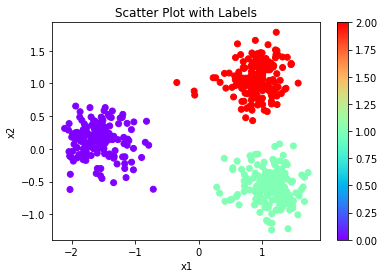

In [70]:
scatterplot(changedData)

After Normalization

In [71]:
def normalize(arr):
    mu = np.mean(arr)
    sd = np.std(arr)
    mod_arr= []
    for a in arr:
#         handling a case where sd is 0.
        if sd==0:
            a = a-mu
        else:
            a = (a-mu)/sd
#         a = a-mu
        mod_arr.append(a)
    return mod_arr

In [72]:

for i in range(data.shape[1]-1):
    data[:,i] = np.array(normalize(data[:,i]))


In [73]:
data.shape

(537, 65)

In [74]:
# Repeating all steps again, but now after normalizing.
nx = data[:,:-1]
ny = data[:,-1]
ndividedLabels = divide_labels(data)
nsw = np.zeros((data.shape[1]-1,data.shape[1]-1))
for t in ndividedLabels:
    nsw = nsw+covMatrix(t)
nsw = nsw+np.eye(nsw.shape[0])*1e-06

nt = []
for i in range(data.shape[1]-1):
    nt.append(np.mean(data[:,i]))
nmuWhole = []
nmuWhole.append(nt)
nmuWhole = np.array(nmuWhole)

nsb = np.zeros((data.shape[1]-1,data.shape[1]-1))
# print(sb)
for t in ndividedLabels:
    nsb = nsb+subSB(t,nmuWhole)
    
    
transformednx= transform(nx,nsw,nsb)

transformednx
    


array([[ 1.98054912+0.j,  0.03915283+0.j],
       [-1.19059851+0.j, -0.84665958+0.j],
       [-0.99614533+0.j,  0.60368575+0.j],
       ...,
       [-1.09046472+0.j,  0.74403453+0.j],
       [-0.81917308+0.j,  0.53404503+0.j],
       [ 1.58384297+0.j, -0.06862412+0.j]])

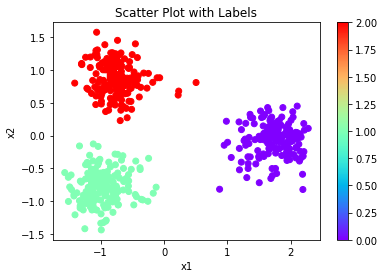

In [75]:
nchangedData = np.c_[transformednx,y] 
scatterplot(nchangedData)

# PCA

In [76]:
from sklearn.decomposition import PCA

In [77]:
pca = PCA(n_components=2)
reducedData = pca.fit_transform(data[:,:-1])

In [78]:
reducedData

array([[ 28.47993992,  -3.43359359],
       [-22.59666568,  17.80122274],
       [ -8.83188034,  11.46680506],
       ...,
       [-22.05029473, -16.58404599],
       [-16.44102253, -17.48311966],
       [ 28.5723742 ,   1.03814292]])

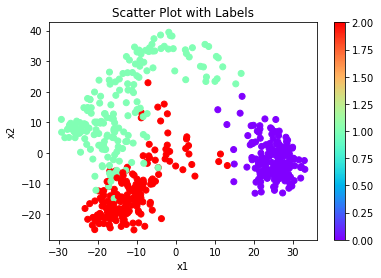

In [79]:
pcaChangedData = np.c_[reducedData,y]
scatterplot(pcaChangedData)

# Part C

In [80]:
# # changedData = np.abs(changedData)
# for i in range(changedData.shape[0]):
#     for j in range(changedData.shape[1]):
#         changedData[i,j]=abs(changedData[i,j])
# print(changedData)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/axes/_axes.py:4193: ComplexWarning: Casting complex values to real discards the imaginary part
  c = np.asanyarray(c, dtype=float)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


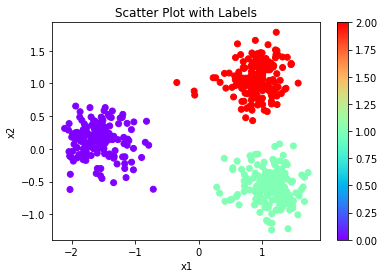

In [81]:
scatterplot(changedData)

In [82]:
changedData

array([[-1.81759867+0.j,  0.24182545+0.j,  0.        +0.j],
       [ 1.35354897+0.j, -0.64398696+0.j,  1.        +0.j],
       [ 1.15909578+0.j,  0.80635837+0.j,  2.        +0.j],
       ...,
       [ 1.25341517+0.j,  0.94670715+0.j,  2.        +0.j],
       [ 0.98212353+0.j,  0.73671765+0.j,  2.        +0.j],
       [-1.42089252+0.j,  0.1340485 +0.j,  0.        +0.j]])

In [83]:
import random

In [84]:
random.shuffle(changedData)

In [85]:
print(changedData.shape)

(537, 3)


In [86]:
labels = set(list(changedData[:,-1]))

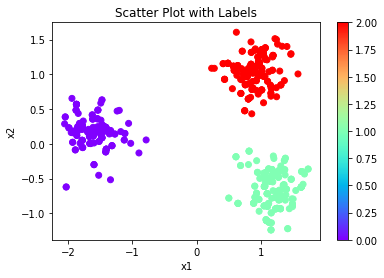

In [87]:
scatterplot(changedData)

In [88]:
def getPostProb(labelset,x):
#     this function returns probability of x being in each label
    x = np.array(x)
    labelset = np.array(labelset)
    D = len(labelset[1,:])
#     print("D is :" + str(D))
    mu = [0]*D
    cov_mat = np.identity(D)
    for i in range(D):
        mu[i] = np.average(labelset[:,i])

    mu = np.array(mu)
    sub_mat = x-mu
    expr = sub_mat.dot(np.linalg.inv(cov_mat)).dot(sub_mat.T)
    ans = (1 / (2 * np.pi)**(D/2)*np.sqrt(np.linalg.det(cov_mat)))*np.exp(expr*-1/2)
    return ans

In [89]:
def getData(divdedLabels,labelsProbab,x):
    #this funciton returns max probabilty index as label.
    allLabelsProb = []
    i = 0
    for dividedLabel in dividedLabels:
#         print(dividedLabel)
        postProb = labelsProbab[i]*getPostProb(dividedLabel,x)
        allLabelsProb.append(postProb)
#         print("********************************************")
    ind = -1
    maxI = -1
    for i in range(len(allLabelsProb)):
        if(maxI<allLabelsProb[i]):
            ind = i
            maxI = allLabelsProb[i]
    return ind

In [90]:
dividedLabels = divide_labels(changedData)
print(len(dividedLabels[0]))

169


/var/folders/53/n8r17vcs1dnb1zb38ynrcz8c0000gn/T/ipykernel_62082/3605993607.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  if(int(x[-1])==L[i]):


In [91]:
l = int(changedData.shape[0]*0.8)
train = changedData[:l,:]
test = changedData[l:,:]

In [92]:
print(train.shape)

(429, 3)


In [93]:
print(test.shape)

(108, 3)


In [94]:
dL = divide_labels(train)

/var/folders/53/n8r17vcs1dnb1zb38ynrcz8c0000gn/T/ipykernel_62082/3605993607.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  if(int(x[-1])==L[i]):


In [95]:
def labProbab(arr):
    arr = list(arr)
    L = sorted(list(set(arr)))
    L1 = [0]*len(L)
    for i in arr:
        for j in range(len(L1)):
            if(L[j]==i):
                t = int(i)
                L1[t]+=1
#     return L1
    for i in range(len(L)):
        L1[i] = L1[i]/len(arr)
    return L1

In [96]:
labelsProbab = labProbab(train[:,-1])

/var/folders/53/n8r17vcs1dnb1zb38ynrcz8c0000gn/T/ipykernel_62082/2224564617.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  t = int(i)


In [97]:
y_true_test = test[:,-1]
y_pred_test = []
for x in test:
    y_pred_test.append(getData(dL,labelsProbab,x[:-1]))


In [98]:
def accuracy(ytrue,ypred):
    sum = 0
    for i in range(len(ytrue)):
        if(ytrue[i]==ypred[i]):
            sum+=1
    return sum/len(ytrue)

In [99]:
print(accuracy(y_pred_test,y_true_test))

1.0


In [100]:
y_true_train = train[:,-1]
y_pred_train = []
for x in train:
    y_pred_train.append(getData(dL,labelsProbab,x[:-1]))
  

In [101]:
print(accuracy(y_pred_train,y_true_train))

1.0


In [102]:
df2 = np.loadtxt('dataset_1.csv',delimiter='\t',dtype = 'float')

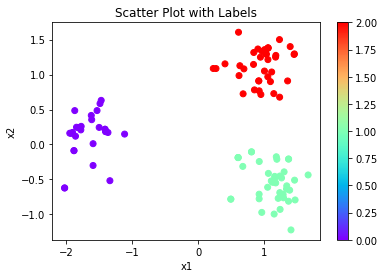

In [103]:
scatterplot(np.c_[test[:,:-1],np.array(list(y_pred_test)).T])

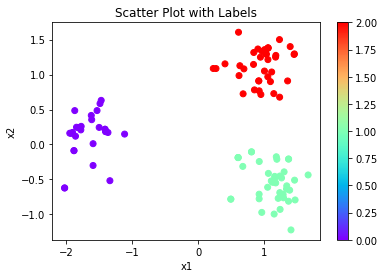

In [104]:
scatterplot(test)

(360000, 2)


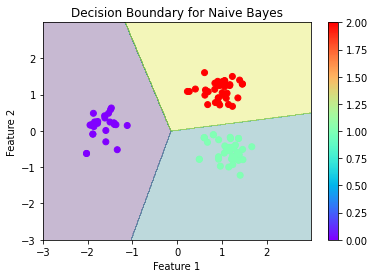

In [105]:
# df2 = df2[1:,:]
# df2 = df2.astype(np.float64)
# assume x1 and x2 are the two features and y_pred are the predicted labels for a 100 test samples
x1 = test[:, 0]
x2 = test[:, 1]

# print(x1.shape)
# choose a value of k
# k = 1

# define the range of x1 and x2 values
x1_min, x1_max = -3, 3
x2_min, x2_max = -3, 3


# create a grid of points to evaluate the model on
xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.01),
                     np.arange(x2_min, x2_max, 0.01),indexing = 'ij')
X = np.c_[xx.ravel(), yy.ravel()]
# zeroes =np.zeros(len(X)).reshape(len(X),1)
predicted2 = []
print(X.shape)
for x in X:
    predicted2.append(getData(dL,labelsProbab,x))
# predicted2 = accuracy(x_train,y_train,X,1)[1]
y_pred = np.array(predicted2)
# print(len(y_pred))
# reshape the predicted labels to match the shape of the grid of points
Z = y_pred.reshape(xx.shape)
# print(Z.shape)
# plot the decision boundary and the input data
plt.contourf(xx, yy, Z, alpha=0.3)
y_pred = np.array(y_pred_test)
plt.scatter(x1, x2, c=y_pred,cmap='rainbow')
plt.colorbar()

# set the plot axis labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for Naive Bayes')

# display the plot
plt.show()
